# Analyze the pilot set to inform current set, then order

### Imports

In [1]:
%load_ext lab_black
# Python standard library
from glob import glob
import os
import socket
import sys

# 3rd party library imports
import dask
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar

tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /mnt/projects/crispy_shifty/projects/crispy_shifties
running on node: dig115


### Set working directory to the root of the crispy_shifty repo

In [2]:
os.chdir("/projects/crispy_shifty")

### First need to fix the `final_order_scores.csv` 
The one with the `_old` suffix has correct design naming, but doesn't include new chB sequences

In [3]:
new_final_scores = os.path.join(
    os.getcwd(), f"projects/crispy_shifties/09_filter_and_order/final_order_scores.csv"
)
old_final_scores = os.path.join(
    os.getcwd(),
    f"projects/crispy_shifties/09_filter_and_order/final_order_scores_old.csv",
)
new_scores_df = pd.read_csv(new_final_scores, index_col="pdb_path")
old_scores_df = pd.read_csv(old_final_scores, index_col="pdb_path")

### Check the differences in columns
As expected, the new df has the 2nd resurfacing and the old has the 1st.

In [4]:
print(set(new_scores_df.columns) - set(old_scores_df.columns))
print(set(old_scores_df.columns) - set(new_scores_df.columns))

{'B_final_seq_r2'}
{'B_final_seq_r1'}


### Check the differences in column values
The new df messed up the id due to iteration over an unsorted set

In [5]:
cols = list(old_scores_df.columns)

cols.remove("mean_pae_interaction")
cols.remove("B_final_seq_r1")

cols = list(sorted(cols))

for col in tqdm(cols):
    if dict(old_scores_df[col]) != dict(new_scores_df[col]):
        print(col)
    else:
        pass

  0%|          | 0/149 [00:00<?, ?it/s]

id


### Merge the two dfs
Keep indexing and values from old_scores_df, add 2nd resurfacing and incorrectly labeled ID

In [6]:
update_df = pd.DataFrame(new_scores_df[["id", "B_final_seq_r2"]])
update_df["incorrect_id"] = update_df["id"]
update_df.drop("id", axis=1, inplace=True)
fixed_df = pd.concat([old_scores_df, update_df], axis=1)
fixed_df.head()

,A_final_seq,A_sap,A_score_per_res,A_total_score,A_wnm_all,A_wnm_helix,B_final_seq,B_sap,B_score_per_res,B_total_score,...,delta_sap_XY,delta_sap_AC,delta_total_score_XY,delta_total_score_AC,A_charge,B_charge,id,B_final_seq_r1,B_final_seq_r2,incorrect_id
pdb_path,,,,,,,,,,,,,,,,,,,,,
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0006/09_filter_and_order_e9b844167bf84dd2ac7cde5045dc43b1.pdb.bz2,DEEVQEAVERAEELREEAEELIKKARKTGDPELLRKALEALEEAVR...,70.064735,-1.903443,-437.791779,0.485354,0.086336,DEKEIKELAKRVAEKIREAFKIAAEGIKKGLEKK,40.034809,-1.143339,-38.873539,...,-3.854572,-31.276978,-517.192989,-96.144745,-12.039856,2.771885,cs_200,IKELAEEVAEKIREAFEIAAEGIEKGLEKR,DIKELAEEVAEKIREAFEIAAQGIEKGL,cs_219
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_739f0d7fe9bd45f986942789620a6f94.pdb.bz2,DEEVQEAVERAEELREEAEELIKKARKTGDPELLRKALEALKEAVR...,57.506268,-2.112674,-485.915070,1.525385,0.076361,VEKEILELAKEVAEEIKEAIKIAAEGIRKGLEKK,49.365849,-1.043685,-35.485302,...,-9.132225,-20.905426,-482.052235,-24.410553,-14.027188,-1.247720,cs_201,SILELAEEVAEEIKEAIRIAAKGIREGLKE,SILELAEEVAEEIKEAIQIAAEGIRRGL,cs_220
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_bd28e57868d440cdb4173b0c83f783f5.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLRELARALVEEAEAVA...,66.934334,-2.067249,-475.467133,0.617158,0.165406,EEEELLRELAELLVRVGRELLEMVEEQVKMIEERK,47.761921,-0.916358,-32.072525,...,-12.801592,-36.269396,-461.256271,-72.235199,-13.394478,-6.134295,cs_202,LLEELAELLVKVGRELLKMVQEQVQMIEER,LLEELAELLVEVGRELLKMVEEQVQMIK,cs_213
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_d07a25241ccd4c968d9c959e563c6ecb.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLEELAEALIEEAKAVA...,64.631165,-2.199711,-505.933533,0.491056,0.176779,AVREKLRELVELLVEVGRRLERVVRRAAERVKRRK,49.346237,-0.892982,-31.254385,...,-20.927460,-29.915047,-556.007822,-38.304382,-28.370214,6.809640,cs_203,VREKLRELVELLVEVGRRLEEVVKRAAERV,KLRELVELLVEVGRRLEEVVERAAERVE,cs_214
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_b06794938c094af0a9e8bf480b919640.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLEELAEALIEEAKAVA...,73.201729,-2.277482,-523.820801,0.348891,0.083955,AVREKLRELVELLVRVGERLRRVAERAAELVKRRR,41.399914,-0.937563,-32.814716,...,-11.018291,-30.554176,-594.738811,-18.317566,-22.385265,5.810639,cs_204,VEEKLRELVELLVHVGERLREVAERAAELV,KLRELVELLVEVGERLREVAERAAELVE,cs_215


### Add a note indicating which things were incorrectly named in 20220413 order
also dump fixed scores

In [7]:
note_df = pd.DataFrame(fixed_df[["id", "incorrect_id"]])

output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/09_filter")

if not os.path.exists(os.path.join(output_path, "fixed_final_order_scores.csv")):
    fixed_df.to_csv(
        os.path.join(output_path, "fixed_final_order_scores.csv"),
        index_label="pdb_path",
    )
if not os.path.exists(os.path.join(output_path, "incorrect_ids.csv")):
    note_df.to_csv(
        os.path.join(output_path, "incorrect_ids.csv"), index_label="pdb_path"
    )

### Load the current set

In [8]:
scores_path = os.path.join(
    os.getcwd(), f"projects/crispy_shifties/09_filter/scores.csv"
)

scores_df = pd.read_csv(scores_path, index_col="Unnamed: 0")

### Load the pilot set

In [9]:
scores_path = os.path.join(
    os.getcwd(), f"projects/crispy_shifties/09_filter/fixed_final_order_scores.csv"
)
pilot_df = pd.read_csv(scores_path, index_col="pdb_path")

### Setup for plotting

In [10]:
sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

### Remove score terms we don't care about

In [11]:
from crispy_shifty.protocols.design import beta_nov16_terms

sample_df = pilot_df[
    [term for term in pilot_df.columns if term not in beta_nov16_terms]
]
print(len(sample_df))
print(list(sample_df.columns))

24
['A_final_seq', 'A_sap', 'A_score_per_res', 'A_total_score', 'A_wnm_all', 'A_wnm_helix', 'B_final_seq', 'B_sap', 'B_score_per_res', 'B_total_score', 'B_wnm_all', 'B_wnm_helix', 'C_final_seq', 'C_sap', 'C_score_per_res', 'C_total_score', 'C_wnm_all', 'C_wnm_helix', 'Y_cms', 'Y_ddg', 'Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_model', 'Y_pTMscore', 'Y_recycles', 'Y_rmsd_to_reference', 'Y_sap', 'Y_score_per_res', 'Y_seed', 'Y_tol', 'Y_total_score', 'Y_type', 'bb_clash', 'bb_clash_delta', 'bb_clash_delta_x', 'best_average_DAN_plddts', 'best_average_plddts', 'best_model', 'best_ptm', 'best_rmsd_to_input', 'buns_parent', 'cms_AcB', 'cms_AnAc', 'cms_AnAcB', 'cms_AnB', 'designed_by', 'docked_helix', 'dssp', 'elapsed_time', 'exposed_hydrophobics_parent', 'geometry_parent', 'holes_all_parent', 'holes_core_parent', 'interface', 'loop_dist', 

### Add data from experiments

In [12]:
good_sec = {name: False for name in sample_df.index}
binds = {name: False for name in sample_df.index}
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_739f0d7fe9bd45f986942789620a6f94.pdb.bz2"
] = True
binds[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_739f0d7fe9bd45f986942789620a6f94.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_d07a25241ccd4c968d9c959e563c6ecb.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_b06794938c094af0a9e8bf480b919640.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_b70f3cd8223848728effbcf15defc053.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0001/09_filter_and_order_1cde2a1cdf5a43b89e435a5525be00f7.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_c83240588a174ccebcfe3fb61d1660b1.pdb.bz2"
] = True
binds[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_c83240588a174ccebcfe3fb61d1660b1.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0006/09_filter_and_order_d5f2693859a149b9b27f34e24e577819.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0006/09_filter_and_order_0b592d906d144108a845e9288a3be6b6.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_e843aaa59cf14fadbbf752bb07a548b0.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_1e3b2aab29414c85acd4b5738d4ba4b1.pdb.bz2"
] = True
binds[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_1e3b2aab29414c85acd4b5738d4ba4b1.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_81621ef5e5204b6ca56877a661b9bf63.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_8f66e3c2aa414e35add1c6572b7f3609.pdb.bz2"
] = True
good_sec[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_b5e055c110be4c49b4056a2b29ce3e09.pdb.bz2"
] = True
binds[
    "/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0002/09_filter_and_order_b5e055c110be4c49b4056a2b29ce3e09.pdb.bz2"
] = True

In [13]:
sec_df = pd.DataFrame.from_dict(good_sec, orient="index", columns=["sec"])
bind_df = pd.DataFrame.from_dict(binds, orient="index", columns=["binds"])
sample_df = pd.concat([sample_df, sec_df, bind_df], axis=1)
sample_df.head()

,A_final_seq,A_sap,A_score_per_res,A_total_score,A_wnm_all,A_wnm_helix,B_final_seq,B_sap,B_score_per_res,B_total_score,...,delta_total_score_XY,delta_total_score_AC,A_charge,B_charge,id,B_final_seq_r1,B_final_seq_r2,incorrect_id,sec,binds
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0006/09_filter_and_order_e9b844167bf84dd2ac7cde5045dc43b1.pdb.bz2,DEEVQEAVERAEELREEAEELIKKARKTGDPELLRKALEALEEAVR...,70.064735,-1.903443,-437.791779,0.485354,0.086336,DEKEIKELAKRVAEKIREAFKIAAEGIKKGLEKK,40.034809,-1.143339,-38.873539,...,-517.192989,-96.144745,-12.039856,2.771885,cs_200,IKELAEEVAEKIREAFEIAAEGIEKGLEKR,DIKELAEEVAEKIREAFEIAAQGIEKGL,cs_219,False,False
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_739f0d7fe9bd45f986942789620a6f94.pdb.bz2,DEEVQEAVERAEELREEAEELIKKARKTGDPELLRKALEALKEAVR...,57.506268,-2.112674,-485.915070,1.525385,0.076361,VEKEILELAKEVAEEIKEAIKIAAEGIRKGLEKK,49.365849,-1.043685,-35.485302,...,-482.052235,-24.410553,-14.027188,-1.247720,cs_201,SILELAEEVAEEIKEAIRIAAKGIREGLKE,SILELAEEVAEEIKEAIQIAAEGIRRGL,cs_220,True,True
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0007/09_filter_and_order_bd28e57868d440cdb4173b0c83f783f5.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLRELARALVEEAEAVA...,66.934334,-2.067249,-475.467133,0.617158,0.165406,EEEELLRELAELLVRVGRELLEMVEEQVKMIEERK,47.761921,-0.916358,-32.072525,...,-461.256271,-72.235199,-13.394478,-6.134295,cs_202,LLEELAELLVKVGRELLKMVQEQVQMIEER,LLEELAELLVEVGRELLKMVEEQVQMIK,cs_213,False,False
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_d07a25241ccd4c968d9c959e563c6ecb.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLEELAEALIEEAKAVA...,64.631165,-2.199711,-505.933533,0.491056,0.176779,AVREKLRELVELLVEVGRRLERVVRRAAERVKRRK,49.346237,-0.892982,-31.254385,...,-556.007822,-38.304382,-28.370214,6.809640,cs_203,VREKLRELVELLVEVGRRLEEVVKRAAERV,KLRELVELLVEVGRRLEEVVERAAERVE,cs_214,True,False
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter_and_order/decoys/0003/09_filter_and_order_b06794938c094af0a9e8bf480b919640.pdb.bz2,SEELERESEEAERRLQEARKRSEEARERGDLEELAEALIEEAKAVA...,73.201729,-2.277482,-523.820801,0.348891,0.083955,AVREKLRELVELLVRVGERLRRVAERAAELVKRRR,41.399914,-0.937563,-32.814716,...,-594.738811,-18.317566,-22.385265,5.810639,cs_204,VEEKLRELVELLVHVGERLREVAERAAELV,KLRELVELLVEVGERLREVAERAAELVE,cs_215,True,False


In [14]:
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

90it [00:05, 17.33it/s]


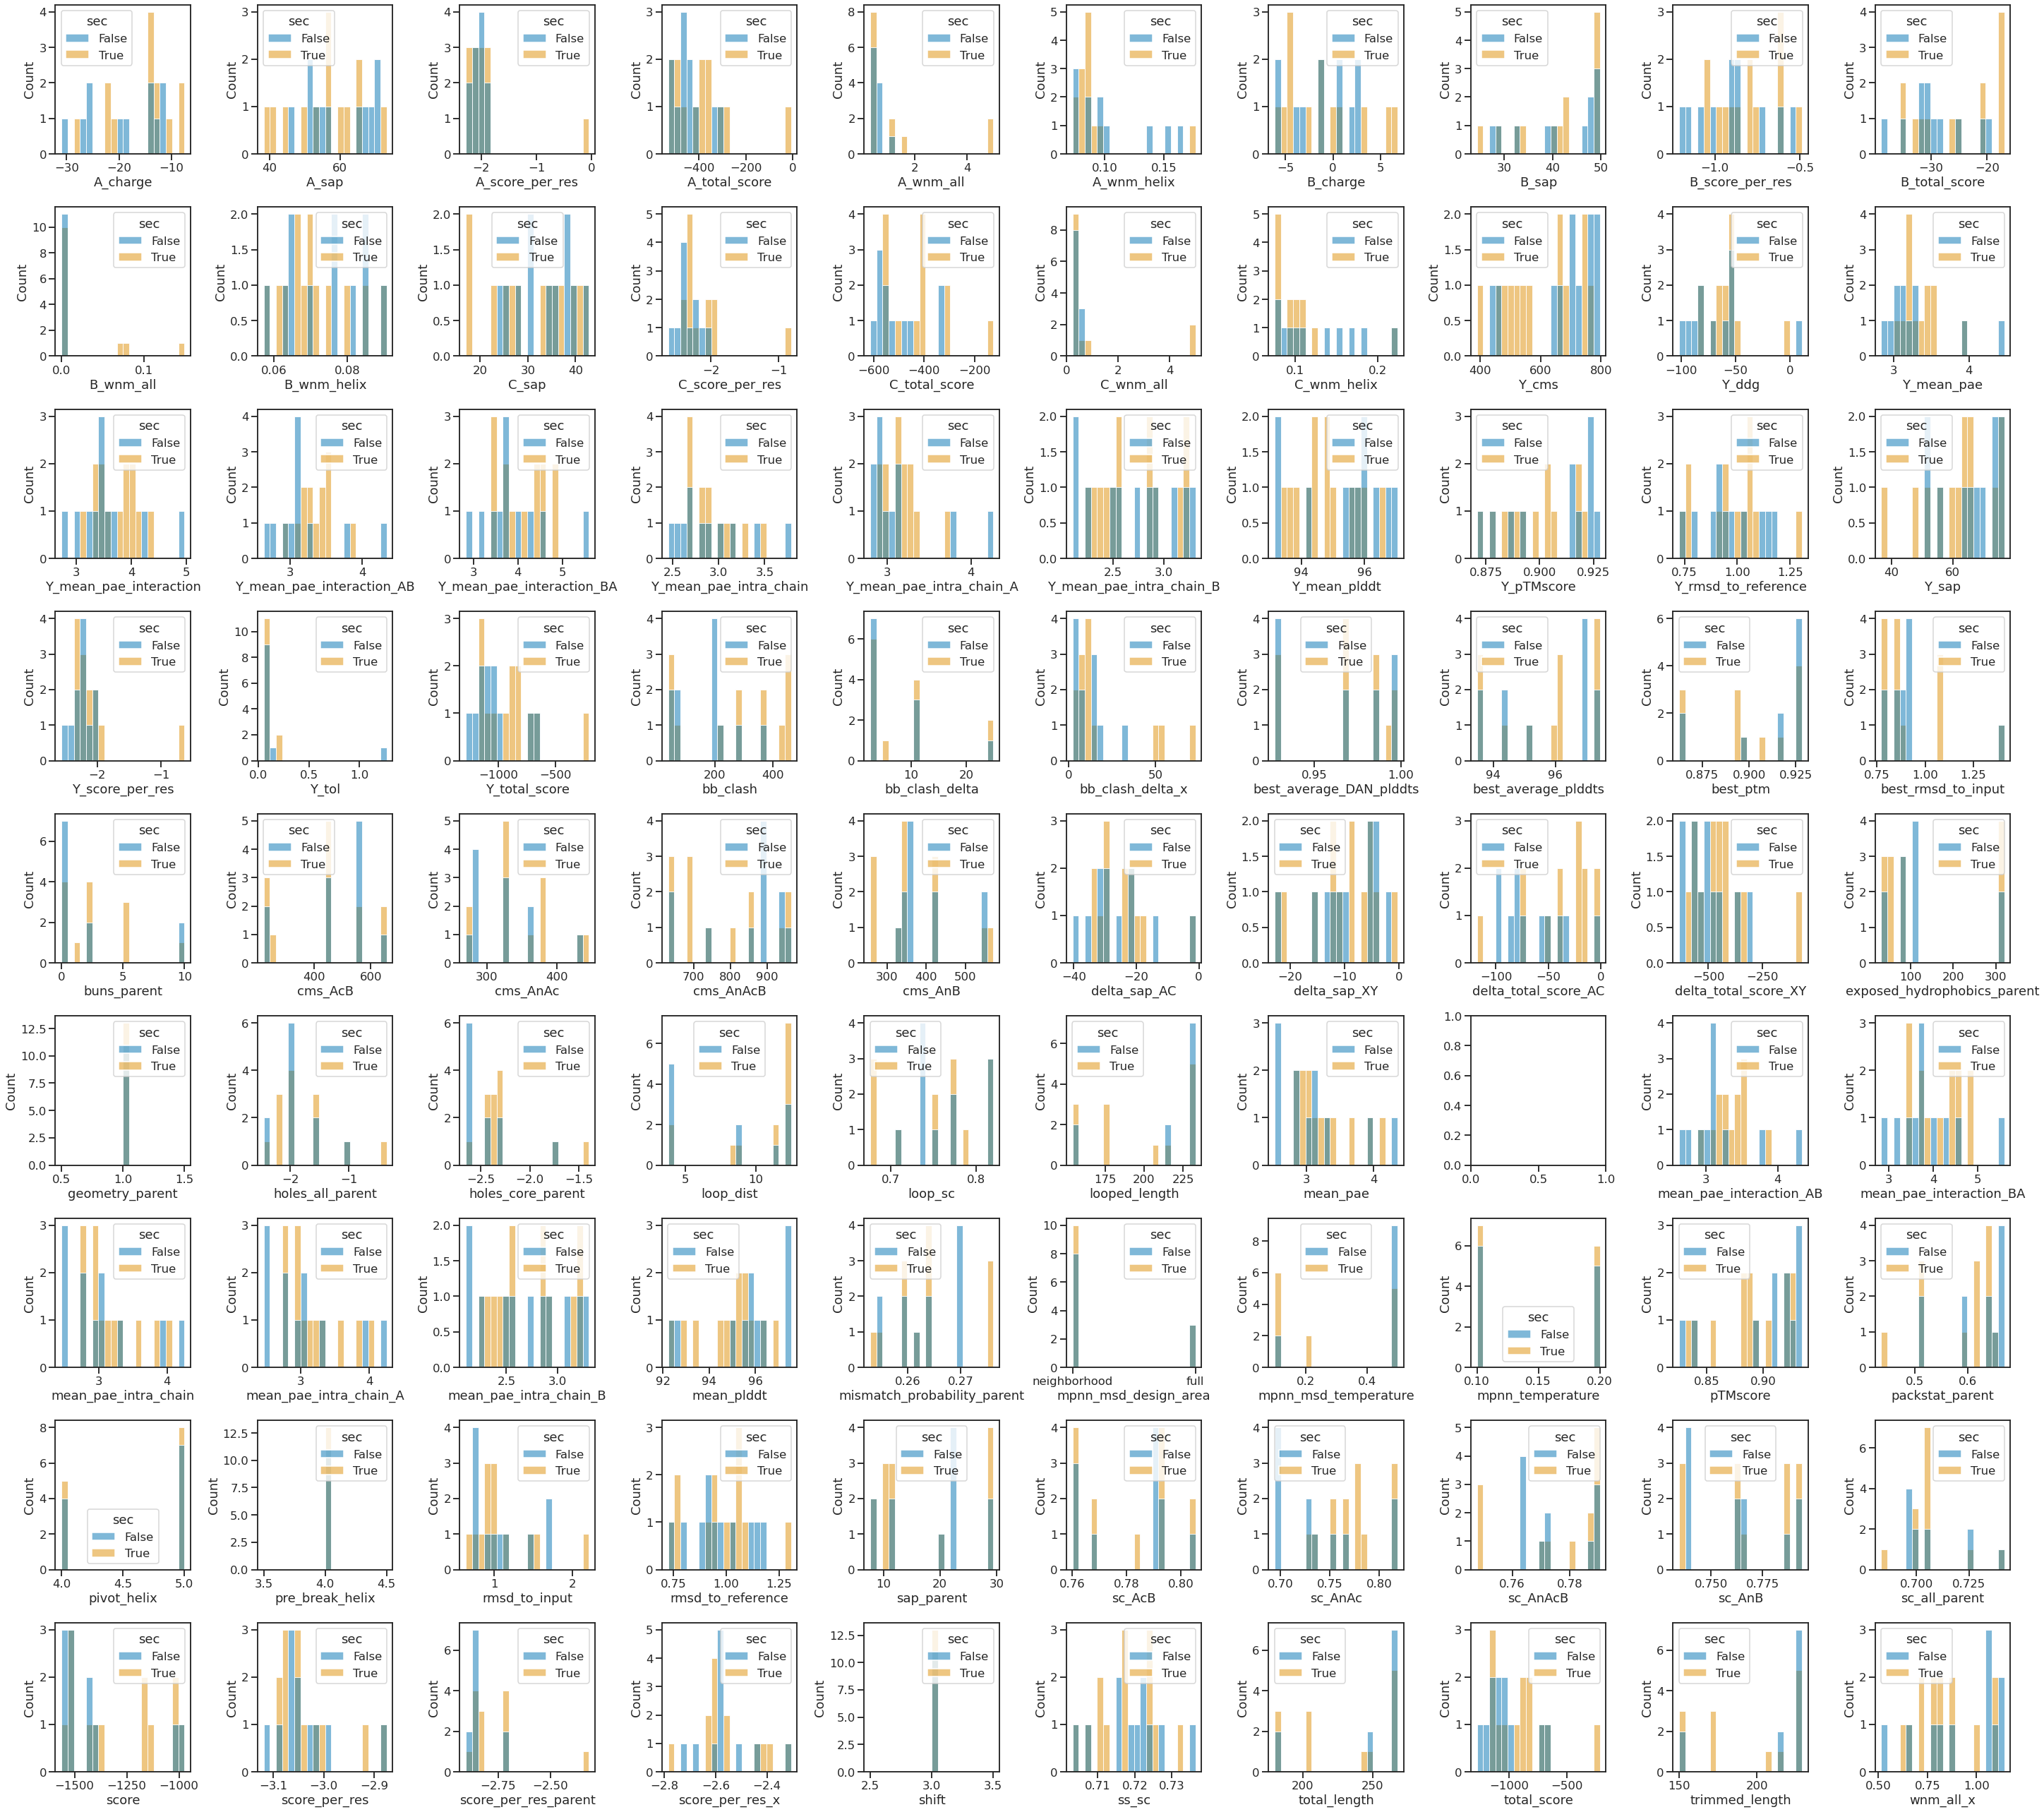

In [15]:
to_plot = [
    "A_sap",
    "A_score_per_res",
    "A_total_score",
    "A_wnm_all",
    "A_wnm_helix",
    "B_sap",
    "B_score_per_res",
    "B_total_score",
    "B_wnm_all",
    "B_wnm_helix",
    "C_sap",
    "C_score_per_res",
    "C_total_score",
    "C_wnm_all",
    "C_wnm_helix",
    "Y_cms",
    "Y_ddg",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_interaction_AB",
    "Y_mean_pae_interaction_BA",
    "Y_mean_pae_intra_chain",
    "Y_mean_pae_intra_chain_A",
    "Y_mean_pae_intra_chain_B",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_rmsd_to_reference",
    "Y_sap",
    "Y_score_per_res",
    "Y_tol",
    "Y_total_score",
    "bb_clash",
    "bb_clash_delta",
    "bb_clash_delta_x",
    "best_average_DAN_plddts",
    "best_average_plddts",
    "best_ptm",
    "best_rmsd_to_input",
    "buns_parent",
    "cms_AcB",
    "cms_AnAc",
    "cms_AnAcB",
    "cms_AnB",
    "exposed_hydrophobics_parent",
    "geometry_parent",
    "holes_all_parent",
    "holes_core_parent",
    "loop_dist",
    "loop_sc",
    "looped_length",
    "mean_pae",
    "mean_pae_interaction",
    "mean_pae_interaction_AB",
    "mean_pae_interaction_BA",
    "mean_pae_intra_chain",
    "mean_pae_intra_chain_A",
    "mean_pae_intra_chain_B",
    "mean_plddt",
    "mismatch_probability_parent",
    "mpnn_msd_design_area",
    "mpnn_msd_temperature",
    "mpnn_temperature",
    "pTMscore",
    "packstat_parent",
    "pivot_helix",
    "pre_break_helix",
    "rmsd_to_input",
    "rmsd_to_reference",
    "sap_parent",
    "sc_AcB",
    "sc_AnAc",
    "sc_AnAcB",
    "sc_AnB",
    "sc_all_parent",
    "score",
    "score_per_res",
    "score_per_res_parent",
    "score_per_res_x",
    "shift",
    "ss_sc",
    "total_length",
    "total_score",
    "trimmed_length",
    "wnm_all_x",
    "delta_sap_XY",
    "delta_sap_AC",
    "delta_total_score_XY",
    "delta_total_score_AC",
    "A_charge",
    "B_charge",
]

cols = [col for col in sorted(sample_df.columns) if col in to_plot]

the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    hue="sec",
    stat="count",
    common_norm=False,
    bins=20,
)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "all_hist.png"))

### Plot X Rosetta metrics
anything with `pae_interaction` in it is no longer relevant

4it [00:00, 15.33it/s]


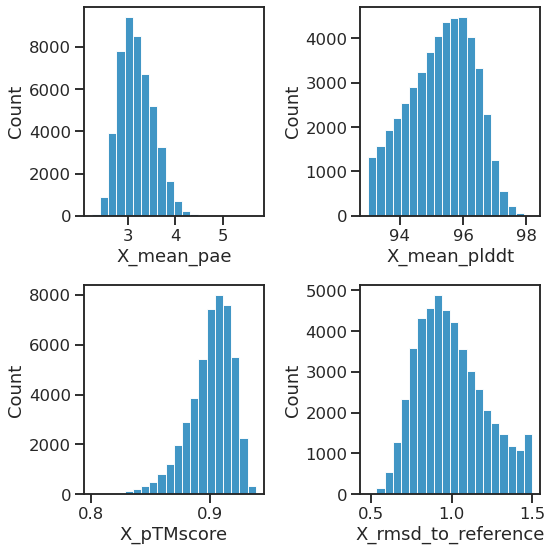

In [16]:
avoid = [
    "X_mean_pae_interaction",
    "X_mean_pae_interaction_AB",
    "X_mean_pae_interaction_BA",
    "X_mean_pae_intra_chain",
    "X_mean_pae_intra_chain_A",
    "X_mean_pae_intra_chain_B",
    "X_model",
    "X_recycles",
    "X_rmsd_to_input",
    "X_seed",
    "X_tol",
    "X_type",
]
cols = [col for col in scores_df.columns if "X_" in col and col not in avoid]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "X_all_scores.png"))

### Plot Y Rosetta metrics

15it [00:01, 10.00it/s]


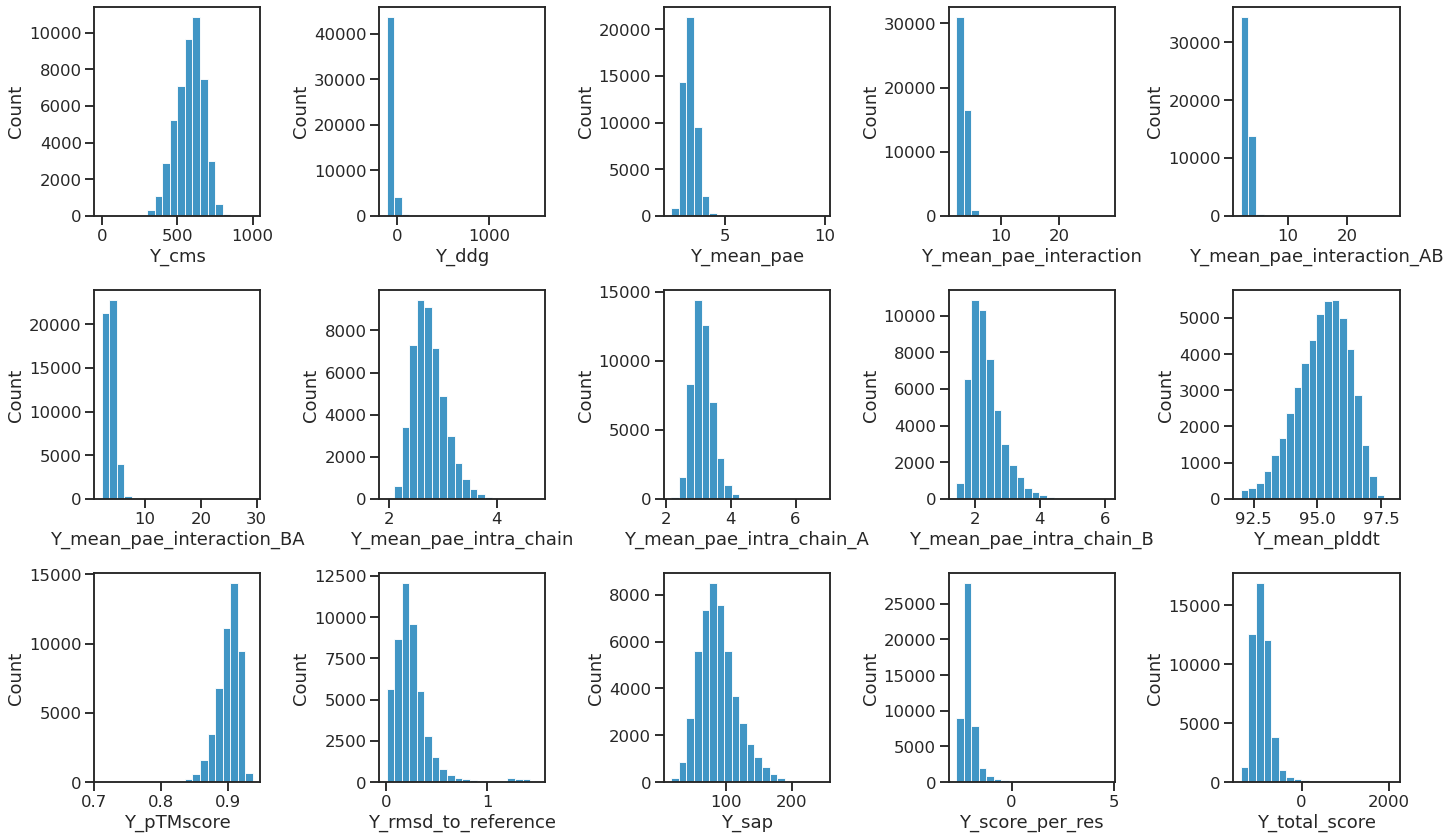

In [17]:
avoid = ["Y_model", "Y_recycles", "Y_rmsd_to_input", "Y_seed", "Y_tol", "Y_type"]
cols = [col for col in scores_df.columns if "Y_" in col and col not in avoid]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "Y_all_scores.png"))

### Plot metrics by chain

5it [00:00, 14.93it/s]


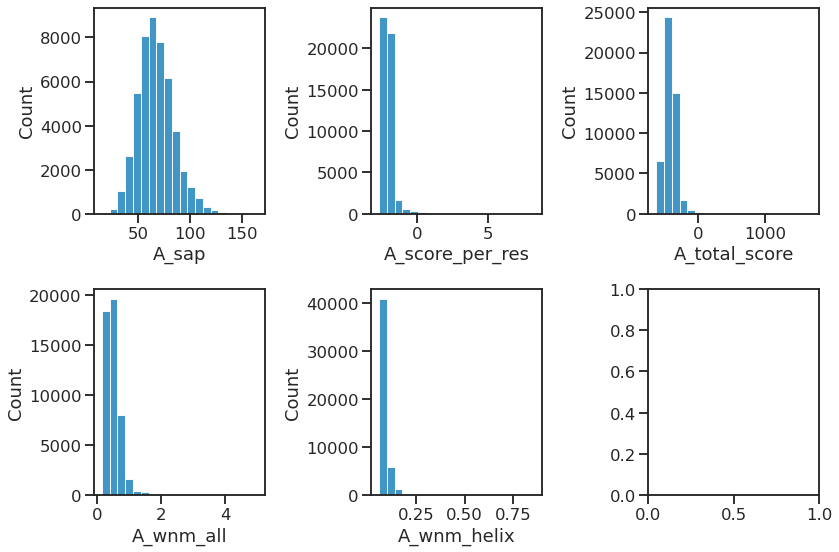

In [18]:
cols = [col for col in scores_df.columns if "A_" in col and "final_seq" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "A_all_scores.png"))

5it [00:00, 15.45it/s]


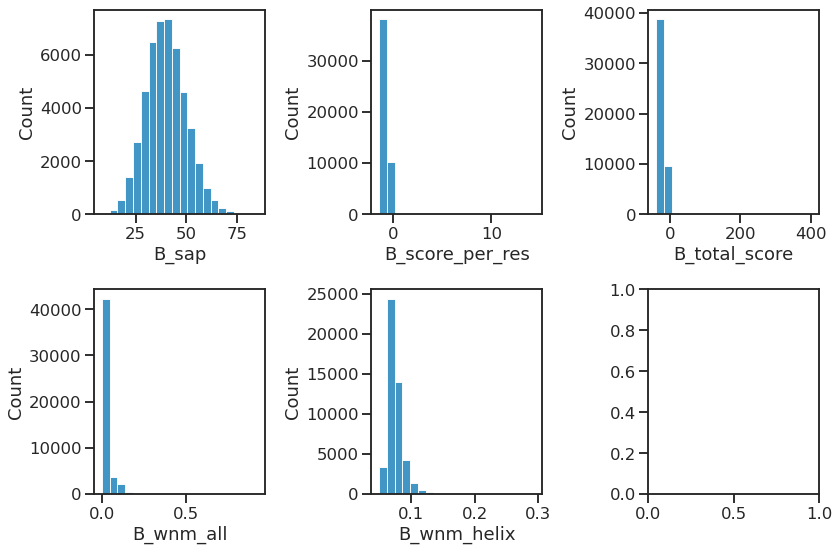

In [19]:
cols = [col for col in scores_df.columns if "B_" in col and "final_seq" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "B_all_scores.png"))

5it [00:00, 15.53it/s]


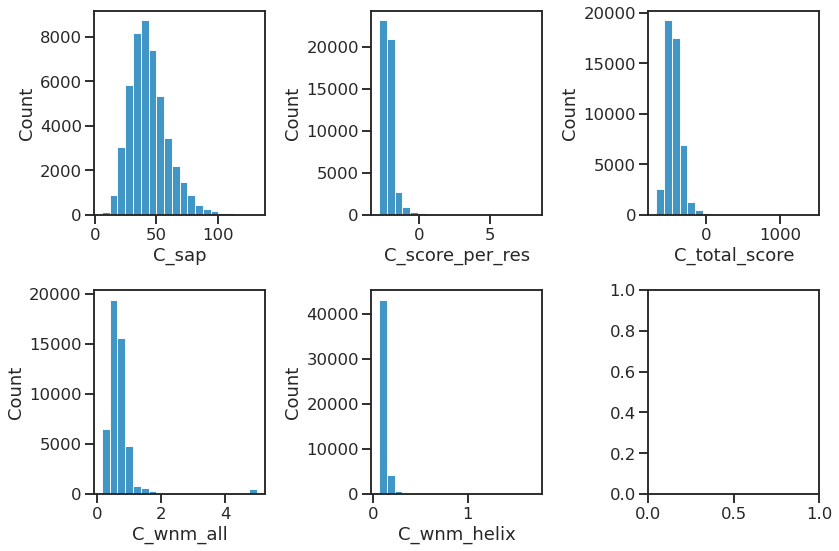

In [20]:
cols = [col for col in scores_df.columns if "C_" in col and "final_seq" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "C_all_scores.png"))

### Plot SAP

8it [00:00, 15.40it/s]


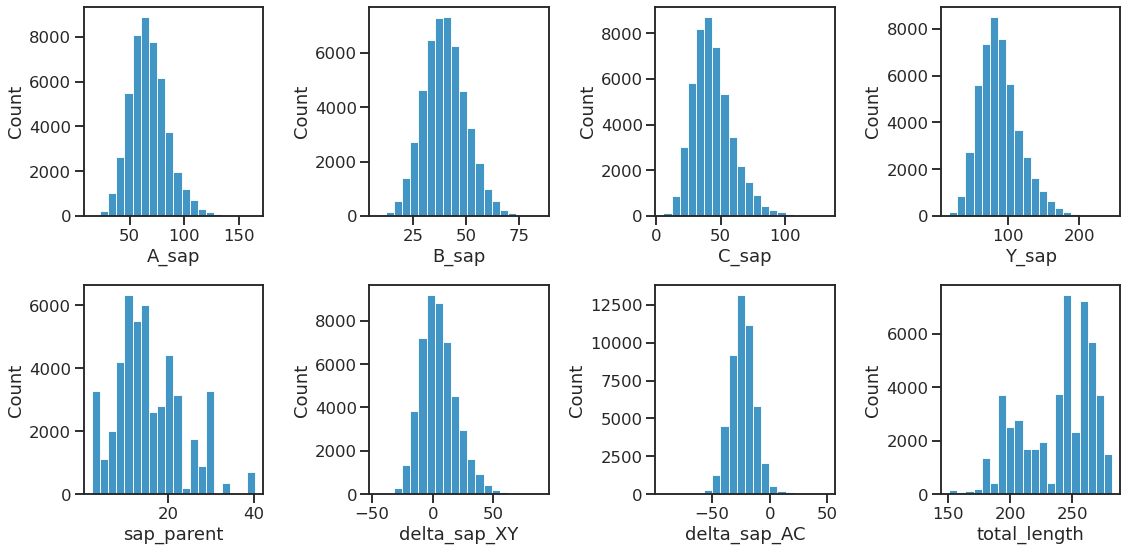

In [21]:
scores_df["delta_sap_XY"] = scores_df["Y_sap"] - (
    scores_df["C_sap"] + scores_df["B_sap"]
)
scores_df["delta_sap_AC"] = scores_df["C_sap"] - scores_df["A_sap"]


cols = [col for col in scores_df.columns if "sap" in col] + ["total_length"]


the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "sap_all_scores.png"))

<Figure size 2304x2304 with 0 Axes>

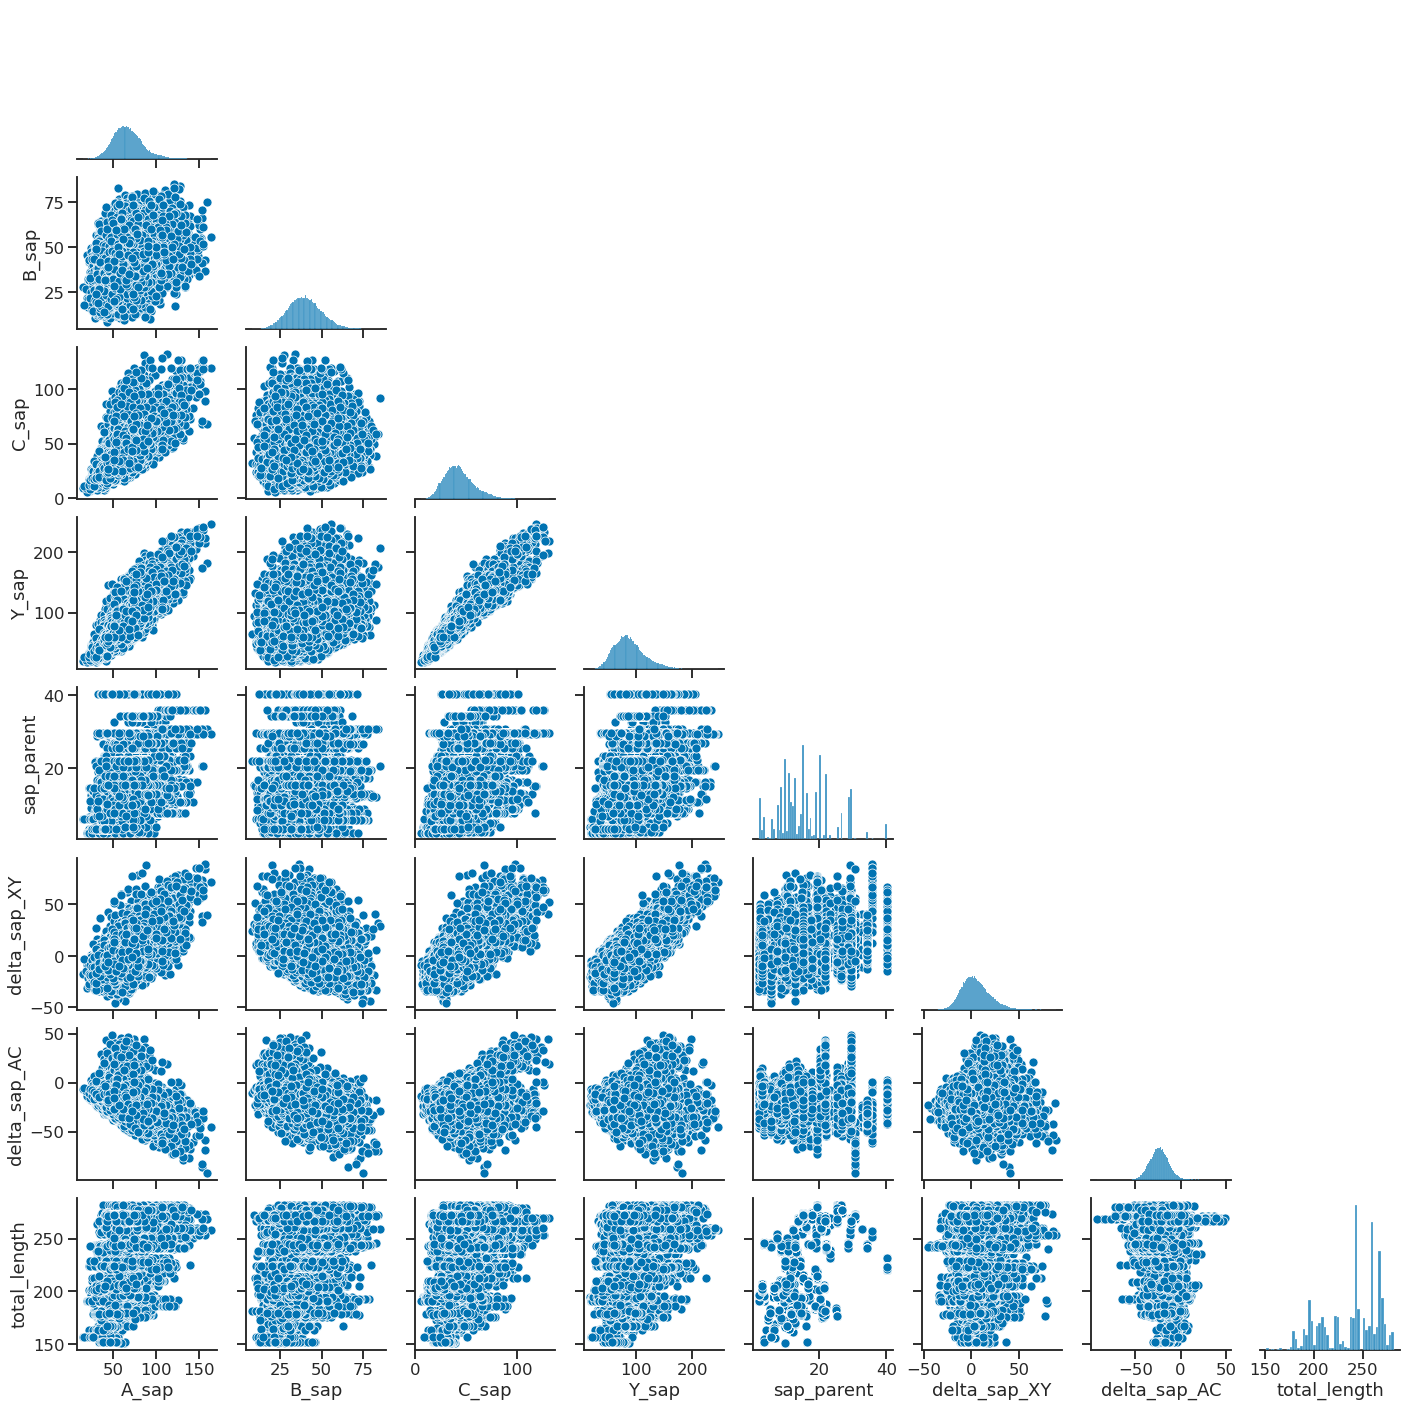

In [22]:
the_fig = pairplot_df(
    df=scores_df,
    cols=cols,
)
plt.savefig(os.path.join(output_path, "sap_all_scores_paired.png"))

### Plot more Rosetta metrics

12it [00:00, 15.80it/s]


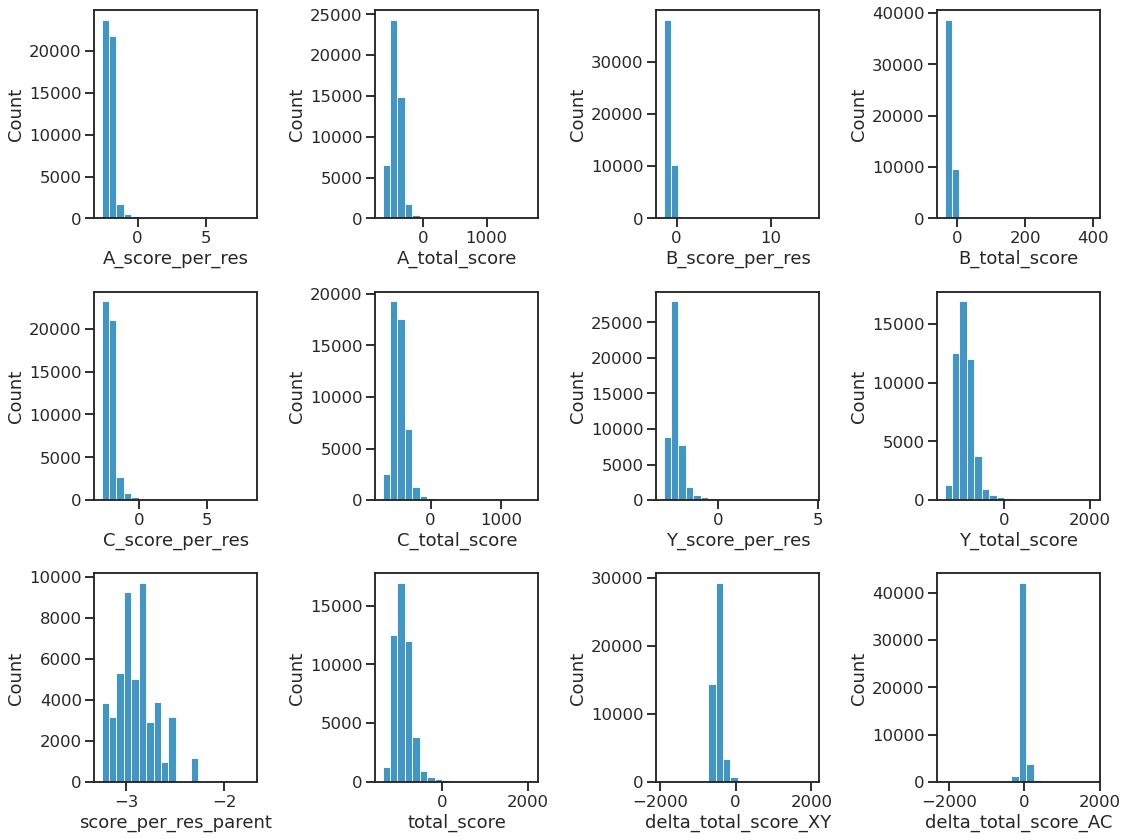

In [23]:
scores_df["delta_total_score_XY"] = scores_df["Y_total_score"] - (
    scores_df["C_total_score"] + scores_df["B_total_score"]
)
scores_df["delta_total_score_AC"] = (
    scores_df["C_total_score"] - scores_df["A_total_score"]
)
avoid = [
    "X_pTMscore",
    "Y_pTMscore",
    "pTMscore",
    "score",
    "score_per_res",
    "score_per_res_x",
]
cols = [col for col in scores_df.columns if "score" in col and col not in avoid]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "rosetta_all_scores.png"))

### Plot parent scores

11it [00:01, 10.71it/s]


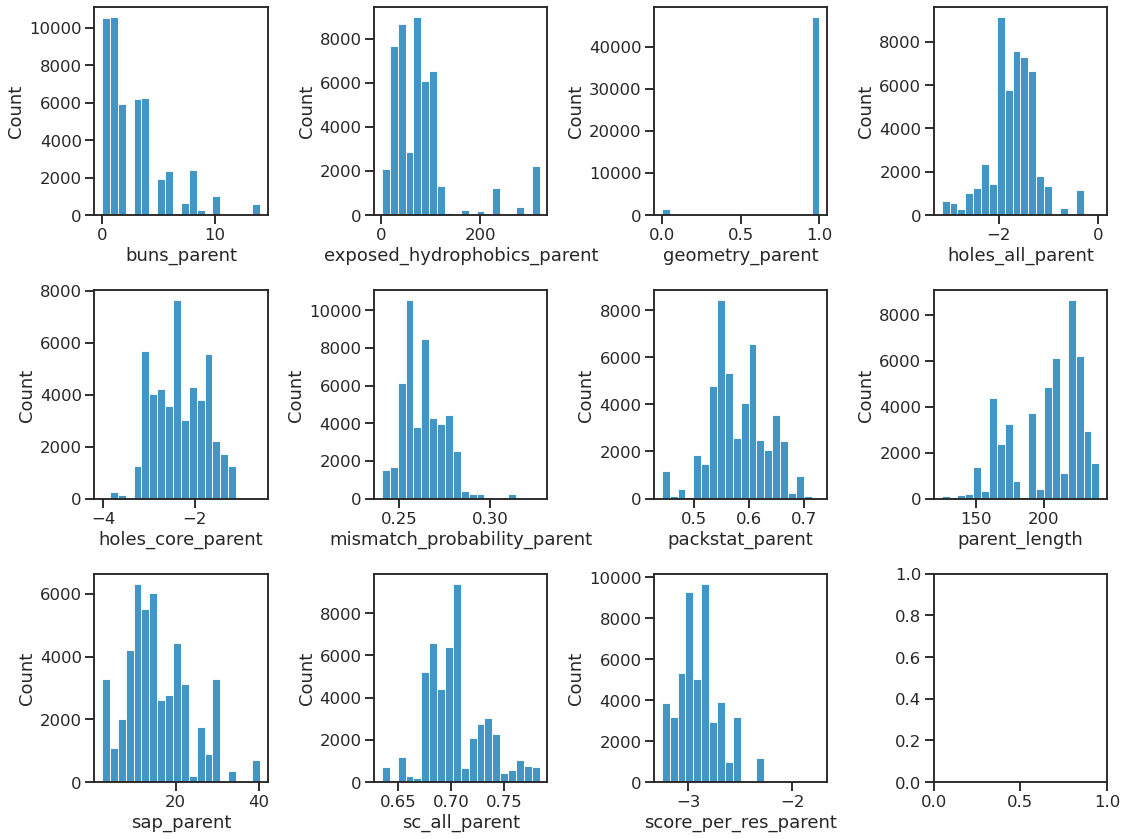

In [24]:
cols = [col for col in scores_df.columns if "parent_" in col or "_parent" in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "parent_all_scores.png"))

### Filter the whole df
Pilot set was filtered like:
```
        "delta_total_score_XY < 0",
        "and delta_total_score_AC < 0",
        "and delta_sap_XY < 0",
        "and delta_sap_AC < 0",
        "and B_sap < 50",
        "and C_sap < 50",
        "and Y_sap < 80",
```

In [25]:
query = " ".join(
    [
        "chBr2_seq != 'X'",
        "and A_wnm_helix < 0.15",
        "and A_wnm_all < 2",
        "and B_sap < 55",
        "and C_sap < 75",
        "and C_score_per_res < 0",
        "and C_wnm_helix < 0.15",
        "and C_wnm_all < 2",
        "and delta_total_score_XY < 0",
        "and delta_total_score_AC < 0",
        "and delta_sap_XY < 0",
        "and delta_sap_AC < 0",
        "and Y_sap < 150",
        "and Y_score_per_res < 0",
    ]
)

filtered = scores_df.query(query)
len(filtered)

9499

In [26]:
len(set([v for v in filtered.parent.values if len(v) == 5]))

20

### Save a list of outputs

In [27]:
simulation_name = "09_filter"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")

with open(os.path.join(output_path, "filtered_orderable.list"), "w") as f:
    for path in tqdm(filtered.index):
        print(path, file=f)

  0%|          | 0/9499 [00:00<?, ?it/s]

### Calculate delta Rg between X and unbound Y

In [28]:
from dask.distributed import Client
import dask.dataframe as dd
from dask_jobqueue import SLURMCluster


def row2delta_rg(row: pd.Series) -> float:
    import sys
    import pyrosetta

    pyrosetta.distributed.maybe_init()
    sys.path.insert(0, "/projects/crispy_shifty")
    from crispy_shifty.protocols.cleaning import path_to_pose_or_ppose
    from crispy_shifty.protocols.states import delta_rg

    state = next(path_to_pose_or_ppose(row.name, pack_result=False))
    chains = list(state.split_by_chain())
    x, y = chains[-1], chains[0]
    to_return = delta_rg(x, y)
    print(row.name, to_return)
    return to_return


simulation_name = "10_analyze_and_order"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")
os.makedirs(output_path, exist_ok=True)
if not os.path.exists(os.path.join(output_path, "filtered.csv")):
    pyrosetta.init()

    futures, rg_mapping = {}, {}

    if __name__ == "__main__":
        # configure SLURM cluster as a context manager
        with SLURMCluster(
            cores=1,
            processes=1,
            job_cpu=1,
            memory="1GB",
            queue="long",
            walltime="3:00:00",
            death_timeout=120,
            local_directory="$TMPDIR",  # spill worker litter on local node temp storage
            log_directory="/mnt/home/pleung/logs/slurm_logs",
            extra=["--lifetime", "3h", "--lifetime-stagger", "5m"],
        ) as cluster:
            print(cluster.job_script())
            # scale between 1-200 workers,
            cluster.adapt(
                minimum=1,
                maximum=200,
                wait_count=999,  # Number of consecutive times that a worker should be suggested for removal it is removed
                interval="5s",  # Time between checks
            )
            # setup a client to interact with the cluster as a context manager
            with Client(cluster) as client:
                print(client)
                # client.upload_file(
                #     os.path.join(os.getcwd(), "crispy_shifty/protocols/states.py")
                # )  # upload the script that contains the functions to distribute
                for i, r in filtered.iterrows():
                    futures[i] = client.submit(row2delta_rg, r)
                for i, pending in futures.items():
                    result = pending.result()
                    rg_mapping[i] = result
                client.close()
            cluster.scale(0)
            cluster.close()
        print("distributed run complete")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Dump the `filtered` with updated rg data

In [29]:
if not os.path.exists(os.path.join(output_path, "filtered.csv")):
    filtered["delta_rg"] = pd.Series(rg_mapping)
    simulation_name = "10_analyze_and_order"
    output_path = os.path.join(
        os.getcwd(), f"projects/crispy_shifties/{simulation_name}"
    )
    filtered.to_csv(os.path.join(output_path, "filtered.csv"), index_label="pdb_path")

### Get a set of 72 by grabbing representatives from each of 72 random states
Prefer stuff with A280, and make a df that shows it is still representative sample

In [30]:
to_order = []
to_order_280 = []
sorted_states = list(sorted(set(filtered.state.values)))
np.random.seed(0)
random_states = list(
    sorted(set(np.random.choice(sorted_states, size=72, replace=False)))
)
for state in tqdm(random_states):
    subset = filtered.query("state == @state")
    sample = subset.sample(1, random_state=0)
    to_order.append(list(sample.index)[0])
    subset_280 = subset[subset["A_final_seq"].str.contains("W|Y") == True]
    if len(subset_280) > 0:
        sample_280 = subset_280.sample(1, random_state=0)
        to_order_280.append(list(sample_280.index)[0])
    else:
        to_order_280.append(list(sample.index)[0])

to_order_df = filtered.loc[to_order]
to_order_280_df = filtered.loc[to_order_280]
to_order_df["280_filt"] = False
to_order_280_df["280_filt"] = True
plot_df = pd.concat([to_order_df, to_order_280_df], ignore_index=True)

  0%|          | 0/72 [00:00<?, ?it/s]

### Dump a list of the order

In [31]:
with open(os.path.join(output_path, "to_order.list"), "w") as f:
    for decoy in to_order_280_df.index:
        print(decoy, file=f)

['A_sap', 'A_score_per_res', 'A_total_score', 'A_wnm_all', 'A_wnm_helix', 'B_sap', 'B_score_per_res', 'B_total_score', 'B_wnm_all', 'B_wnm_helix', 'C_sap', 'C_score_per_res', 'C_total_score', 'C_wnm_all', 'C_wnm_helix', 'Y_cms', 'Y_ddg', 'Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_pTMscore', 'Y_rmsd_to_reference', 'Y_sap', 'Y_score_per_res', 'Y_tol', 'Y_total_score', 'bb_clash', 'bb_clash_delta', 'bb_clash_delta_x', 'best_average_DAN_plddts', 'best_average_plddts', 'best_ptm', 'best_rmsd_to_input', 'buns_parent', 'cms_AcB', 'cms_AnAc', 'cms_AnAcB', 'cms_AnB', 'delta_sap_AC', 'delta_sap_XY', 'delta_total_score_AC', 'delta_total_score_XY', 'exposed_hydrophobics_parent', 'geometry_parent', 'holes_all_parent', 'holes_core_parent', 'loop_dist', 'loop_sc', 'looped_length', 'mean_pae', 'mean_pae_interaction', 'mean_pae_interaction_AB', 'mea

88it [00:03, 22.38it/s]


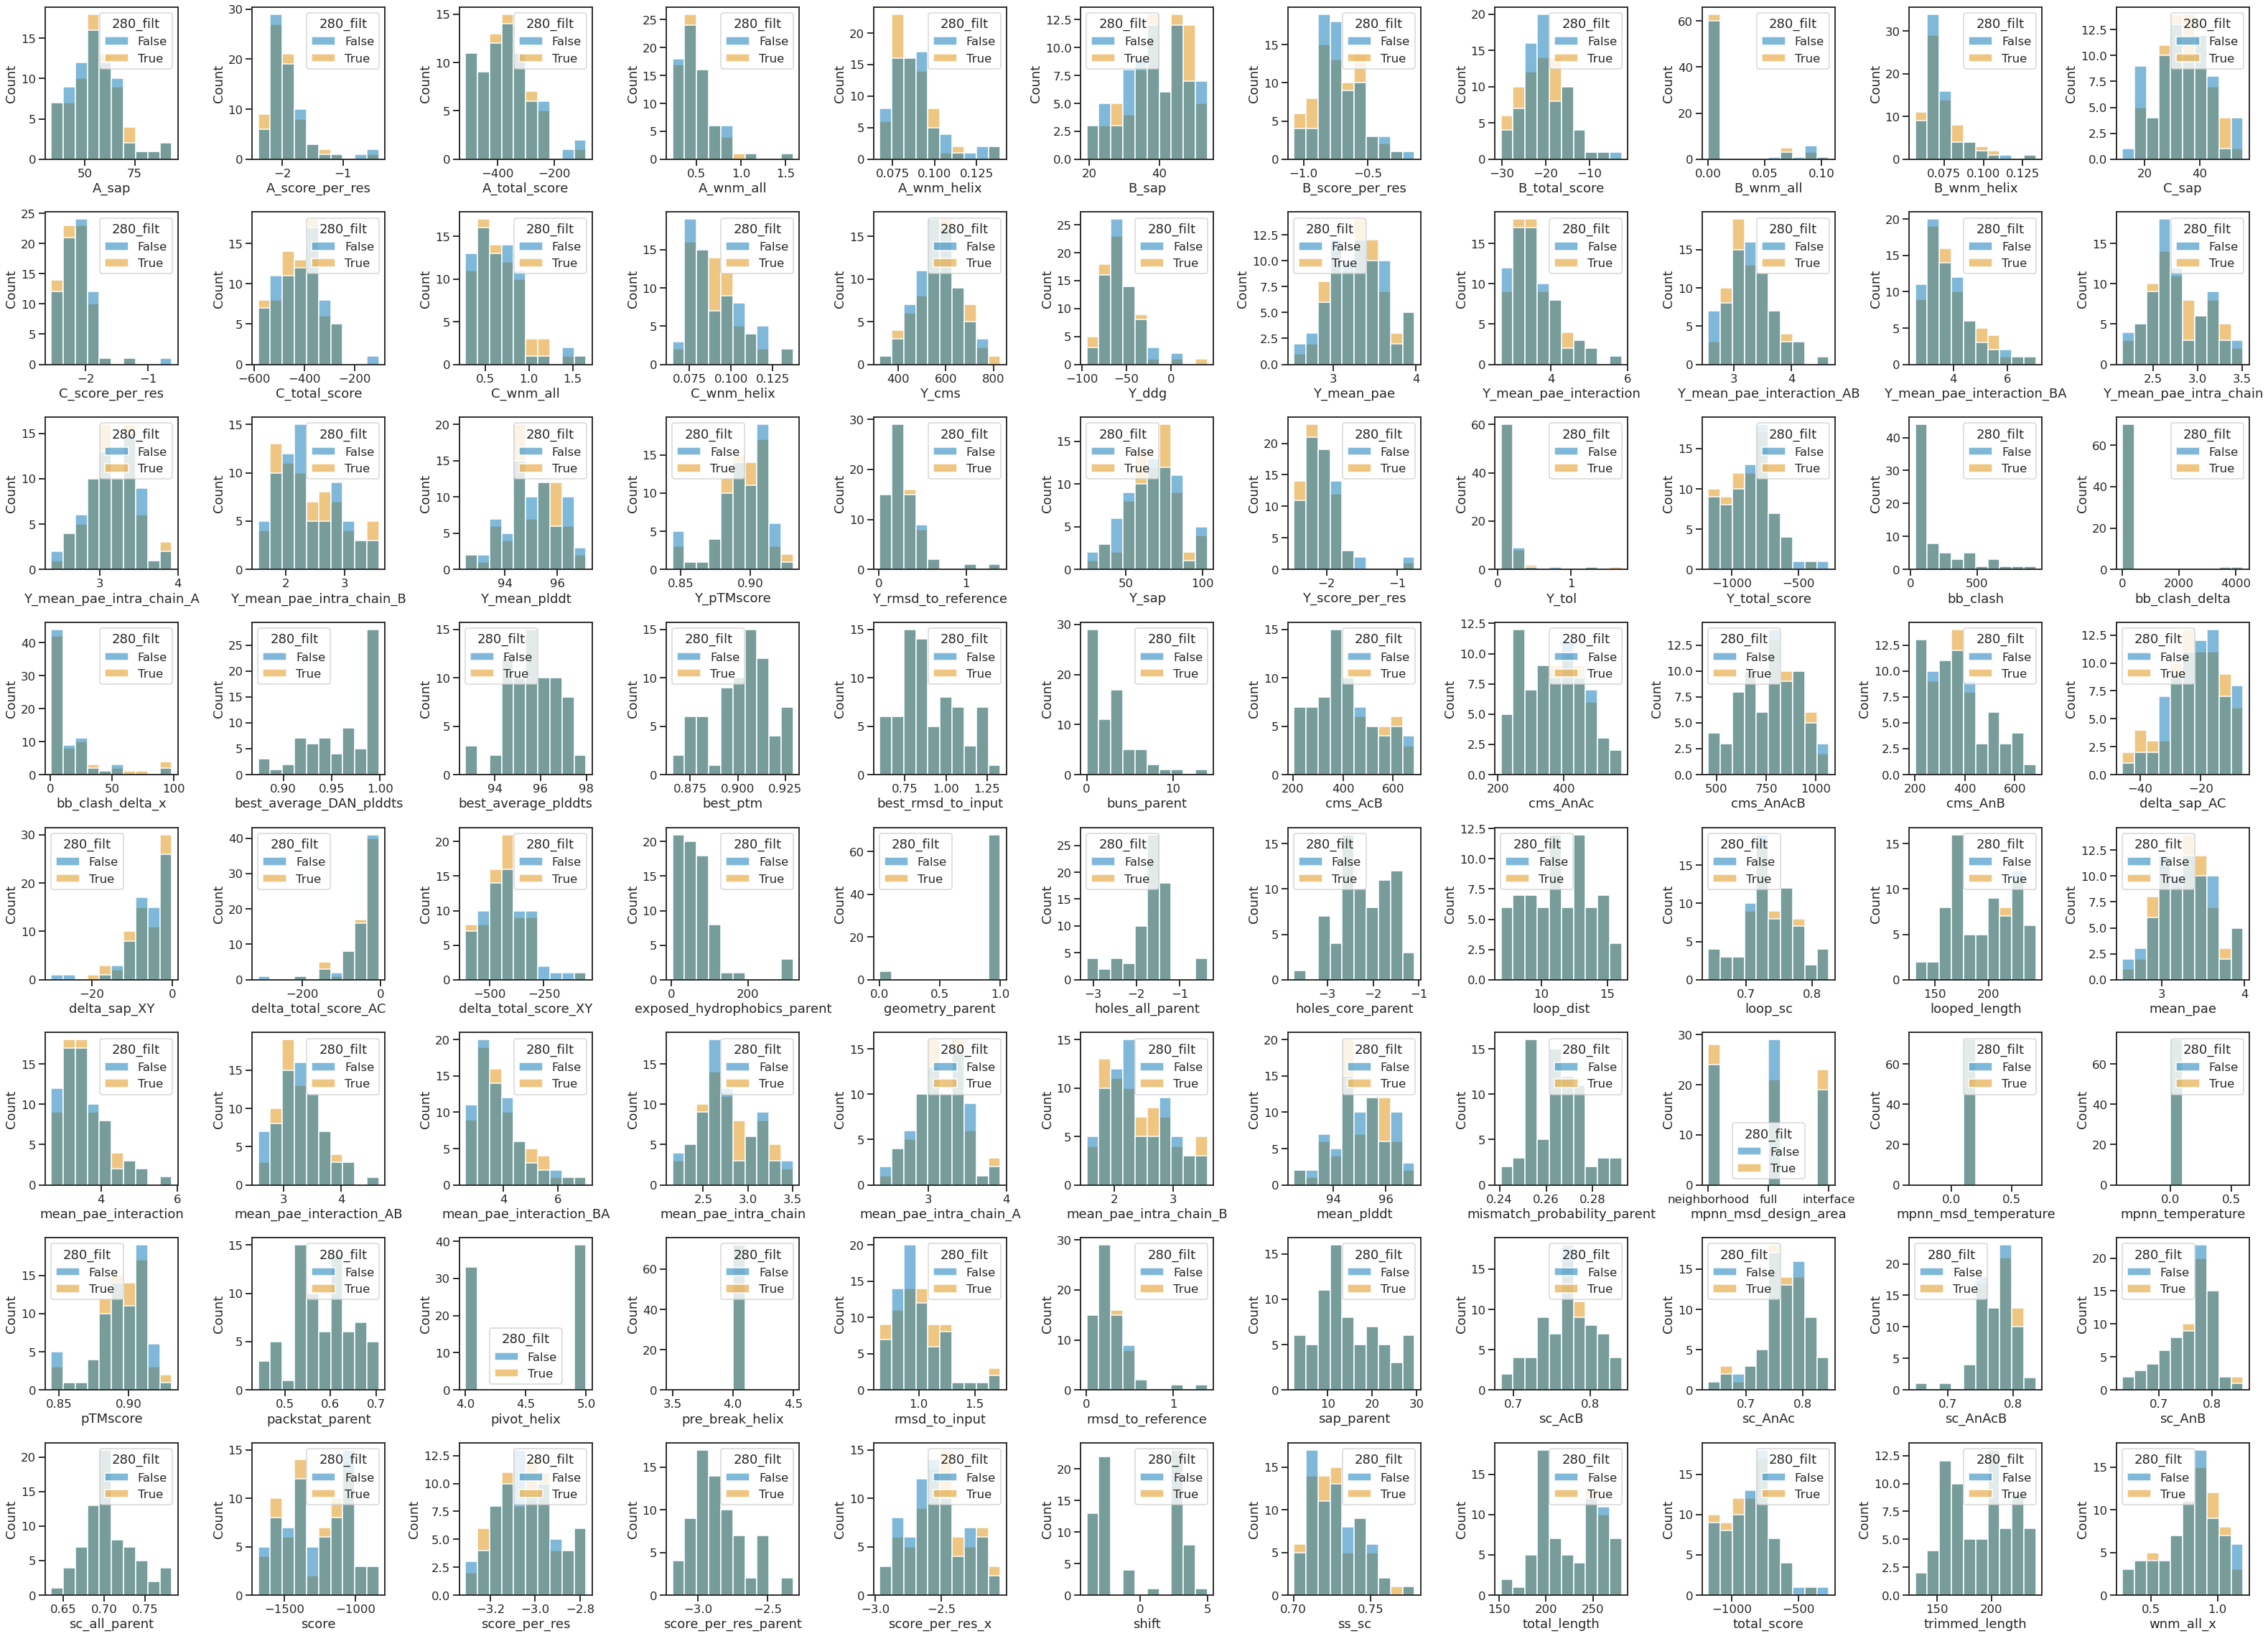

In [32]:
to_plot = [
    "A_sap",
    "A_score_per_res",
    "A_total_score",
    "A_wnm_all",
    "A_wnm_helix",
    "B_sap",
    "B_score_per_res",
    "B_total_score",
    "B_wnm_all",
    "B_wnm_helix",
    "C_sap",
    "C_score_per_res",
    "C_total_score",
    "C_wnm_all",
    "C_wnm_helix",
    "Y_cms",
    "Y_ddg",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_interaction_AB",
    "Y_mean_pae_interaction_BA",
    "Y_mean_pae_intra_chain",
    "Y_mean_pae_intra_chain_A",
    "Y_mean_pae_intra_chain_B",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_rmsd_to_reference",
    "Y_sap",
    "Y_score_per_res",
    "Y_tol",
    "Y_total_score",
    "bb_clash",
    "bb_clash_delta",
    "bb_clash_delta_x",
    "best_average_DAN_plddts",
    "best_average_plddts",
    "best_ptm",
    "best_rmsd_to_input",
    "buns_parent",
    "cms_AcB",
    "cms_AnAc",
    "cms_AnAcB",
    "cms_AnB",
    "exposed_hydrophobics_parent",
    "geometry_parent",
    "holes_all_parent",
    "holes_core_parent",
    "loop_dist",
    "loop_sc",
    "looped_length",
    "mean_pae",
    "mean_pae_interaction",
    "mean_pae_interaction_AB",
    "mean_pae_interaction_BA",
    "mean_pae_intra_chain",
    "mean_pae_intra_chain_A",
    "mean_pae_intra_chain_B",
    "mean_plddt",
    "mismatch_probability_parent",
    "mpnn_msd_design_area",
    "mpnn_msd_temperature",
    "mpnn_temperature",
    "pTMscore",
    "packstat_parent",
    "pivot_helix",
    "pre_break_helix",
    "rmsd_to_input",
    "rmsd_to_reference",
    "sap_parent",
    "sc_AcB",
    "sc_AnAc",
    "sc_AnAcB",
    "sc_AnB",
    "sc_all_parent",
    "score",
    "score_per_res",
    "score_per_res_parent",
    "score_per_res_x",
    "shift",
    "ss_sc",
    "total_length",
    "total_score",
    "trimmed_length",
    "wnm_all_x",
    "delta_sap_XY",
    "delta_sap_AC",
    "delta_total_score_XY",
    "delta_total_score_AC",
    "A_charge",
    "B_charge",
]

cols = [col for col in sorted(plot_df.columns) if col in to_plot]
print(cols)

the_fig = histplot_df(
    df=plot_df,
    cols=cols,
    hue="280_filt",
    bins=10,
)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "order_differences.png"))

### Add ID column

In [33]:
ids = [f"cs_{i}" for i in range(224, 296)]
to_order_280_df["id"] = ids
to_order_280_df

,A_final_seq,A_sap,A_score_per_res,A_total_score,A_wnm_all,A_wnm_helix,B_final_seq,B_sap,B_score_per_res,B_total_score,...,type,wnm_all_x,yhh_planarity,cms,delta_sap_XY,delta_sap_AC,delta_total_score_XY,delta_total_score_AC,280_filt,id
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0033/09_filter_521c9c7cd8344111b7df20473ef19b31.pdb.bz2,SLKEKVEELAQRIREQLPDTELAREAQELADEARKSDDERLLRVAY...,63.038757,-1.833439,-278.682739,0.465579,0.101278,MEEERERVVELAIRVLEQLLSELSRS,39.444138,-0.922737,-23.991154,...,monomer_ptm,1.063863,2.044467e-07,NaN,-1.712543,-27.547108,-339.659908,-10.224731,True,cs_224
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0046/09_filter_74373be5389446d3b1bdd924ad60c7b5.pdb.bz2,SEAEELARRAAKEAKELMKRSTDEELRKELKKLAELLKELAERAPD...,59.900856,-2.047253,-378.741852,0.463115,0.079953,SMASEIEDLATEILELVKELIRSLGEKE,48.682411,-0.681548,-19.083349,...,monomer_ptm,0.746639,3.390217e-07,605.557678,-20.652370,-22.294743,-452.674921,-14.967834,True,cs_225
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0041/09_filter_41a4d14b27264754bcbd82c98167f61f.pdb.bz2,SEAEELARRAAKEAKELMKRSTDEELRKELKKLAELLKELAERYPD...,61.320908,-2.089952,-380.371338,0.600353,0.090613,VKREEVKELIREVLELMLRLLDDGIKEG,49.861580,-0.283391,-7.934951,...,monomer_ptm,0.915747,5.030602e-07,556.560852,-11.419426,-25.277939,-416.971421,-6.809692,True,cs_226
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0021/09_filter_eee1605659434bf8a265585d5da845ee.pdb.bz2,DMEERLRQEVEKAEKELEKLAKQSTDEEVRQIAREVAKQLRRLAEL...,53.944031,-2.060217,-432.645569,0.318782,0.085757,SLEELSEELVEQAKRVLEKVLELGEKIA,43.706646,-0.836395,-23.419056,...,monomer_ptm,0.950859,4.970220e-07,688.170959,-16.277689,-22.109297,-498.163006,-33.505646,True,cs_227
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0047/09_filter_fb680d42968349158224584ea0630ad7.pdb.bz2,DEEERLRQEVEKAEKELEKLAKQSTDEEVRQLAREVAKRLRRLAEE...,58.015480,-1.893422,-399.512085,0.728908,0.074792,SKTKARRELFEIALDLLDFVEERLEEEL,47.145306,-0.651672,-18.246824,...,monomer_ptm,1.112293,0.000000e+00,761.600769,-15.882622,-34.983276,-475.094759,-28.542084,True,cs_228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0034/09_filter_057212027afa4c67bf0da8933b883472.pdb.bz2,GAAERLRRKVEEAKRKAREVEEKAKKKGDEKAKRAAEKVERAAEKA...,62.779732,-1.893645,-441.219238,0.907104,0.072221,EKEKVVETILELAEKAEEVLDTAEKIVK,37.092815,-0.776924,-21.753860,...,monomer_ptm,0.942793,2.765587e-07,706.760254,-0.343660,-41.553392,-522.948471,-71.523865,True,cs_291
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0005/09_filter_b18f6483c4fa473ba5d88a2e31a1da8f.pdb.bz2,EEEERLRRAVEEAVREAERVREEAKKSGSEEAREVAREVREAAERA...,63.547123,-2.173718,-508.650146,0.342405,0.076305,EVIRLGFEVAERVEELLREAREIIEATA,46.859589,-0.565193,-15.825398,...,monomer_ptm,0.775421,3.463230e-07,587.072998,-5.089111,-26.070057,-464.225505,-4.767212,True,cs_292
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0034/09_filter_4462712ed9d445ddab3e7d02a5f171e0.pdb.bz2,SEAKELAEEIEKELEEILEVAKEVLEIAKDSEKAKKVVKEVEEAAE...,90.198715,-1.684030,-409.219299,0.652435,0.075281,SLVKEVIDKSKEILDIVEEMVEIAEKMI,53.429707,-0.824625,-23.089499,...,monomer_ptm,0.860552,8.724629e-07,849.935608,-0.124474,-45.916325,-433.907938,-132.572327,True,cs_293
/mnt/projects/crispy_shifty/projects/crispy_shifties/09_filter/decoys/0048/09_filter_8e3bb086544b47cf837b14283ad5aacb.pdb.bz2,DEEKRKELEELLRRVEEALQRAREAIERGDPETAREALERAEDLAR...,61.095917,-2.185642,-507.068909,0.617117,0.101061,ELAEELLETAEEFREVLDEFRRRVRARR,35.842999,-0.689127,-19.295565,...,monomer_ptm,0.527311,0.000000e+00,646.872131,-8.872799,-33.060963,-544.205168,-77.615662,True,cs_294


### Dump PDBs and FASTAs

In [34]:
import shutil

simulation_name = "10_analyze_and_order"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")
pdbs_path = os.path.join(output_path, "pdbs")
os.makedirs(pdbs_path, exist_ok=True)
with open(os.path.join(output_path, "20220520_order.fasta"), "w") as f:
    for i, r in tqdm(to_order_280_df.iterrows(), total=to_order_280_df.shape[0]):
        print(f">{r.id}A", file=f)
        print(f"{r.A_final_seq}", file=f)
        print(f">{r.id}B", file=f)
        print(f"{r.B_final_seq}", file=f)
        shutil.copy(i, os.path.join(pdbs_path, f"{r.id}.pdb.bz2"))

  0%|          | 0/72 [00:00<?, ?it/s]

### Fix the pdb names in `09_filter_and_order/pdbs`

In [35]:
scores_path = os.path.join(
    os.getcwd(), f"projects/crispy_shifties/09_filter/fixed_final_order_scores.csv"
)
pilot_df = pd.read_csv(scores_path, index_col="pdb_path")
old_ids = pilot_df.incorrect_id.values
new_ids = pilot_df.id.values
old2new = dict(zip(old_ids, new_ids))
simulation_name = "09_filter_and_order"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")
pdbs_path = os.path.join(output_path, "pdbs")
# fix incorrect
for pdb in glob(os.path.join(pdbs_path, "*r2.pdb")):
    old_id = pdb.split("/")[-1].replace("r2.pdb", "")
    new_id = old2new[old_id]
    new_file = os.path.join(os.getcwd(), new_id + "r2.pdb")
    os.rename(pdb, new_file)

for pdb in glob(os.path.join(os.getcwd(), "*r2.pdb")):
    os.rename(pdb, os.path.join(pdbs_path, pdb.split("/")[-1]))

### Dump CSV of order

In [36]:
simulation_name = "10_analyze_and_order"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")
to_order_280_df.to_csv(
    os.path.join(output_path, "to_order_280.csv"), index_label="pdb_path"
)

### Dump resurfaced B's for a subset of interest

In [41]:
simulation_name = "10_analyze_and_order"
output_path = os.path.join(os.getcwd(), f"projects/crispy_shifties/{simulation_name}")

reorder = [
    "cs_228",
    "cs_231",
    "cs_232",
    "cs_235",
    "cs_236",
    "cs_244",
    "cs_245",
    "cs_246",
    "cs_251",
    "cs_253",
    "cs_254",
    "cs_258",
    "cs_260",
    "cs_261",
    "cs_263",
    "cs_268",
    "cs_270",
    "cs_271",
    "cs_272",
    "cs_275",
    "cs_285",
    "cs_286",
    "cs_290",
    "cs_295",
]

with open(os.path.join(output_path, "20220623_order.fasta"), "w") as f:
    for seq in ["chBr1_seq", "chBr2_seq"]:
        for i, r in tqdm(to_order_280_df.iterrows(), total=to_order_280_df.shape[0]):
            if r.id not in reorder:
                continue
            else:
                pass
            print(f">{r.id}{seq[2:5]}", file=f)
            print(f"{r[seq]}", file=f)

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

### Dump PDBs for resurfaced B's TODO